# Support Vector Machines with Python

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

The built in breast cancer dataset from Scikit Learn. We can get with the load function:

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

The data set is presented in a dictionary form:

In [16]:
cancer.keys()
type(cancer['data'])
# cancer['data'].shape
cancer['data'].shape

(569, 30)

In [18]:
type(cancer['feature_names'])

numpy.ndarray

## Set up DataFrame

In [9]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.info()
df.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [20]:
cancer['target'].shape
type(cancer['target'])

numpy.ndarray

In [23]:
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
Cancer    569 non-null int32
dtypes: int32(1)
memory usage: 2.3 KB


In [24]:
df['target'] = df_target['Cancer']


In [25]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [27]:
df.to_csv('cancer.csv', encoding='utf-8')
df.shape

(569, 31)

Now let's actually check out the dataframe!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027FB6FDA630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027FB7C3B668>]], dtype=object)

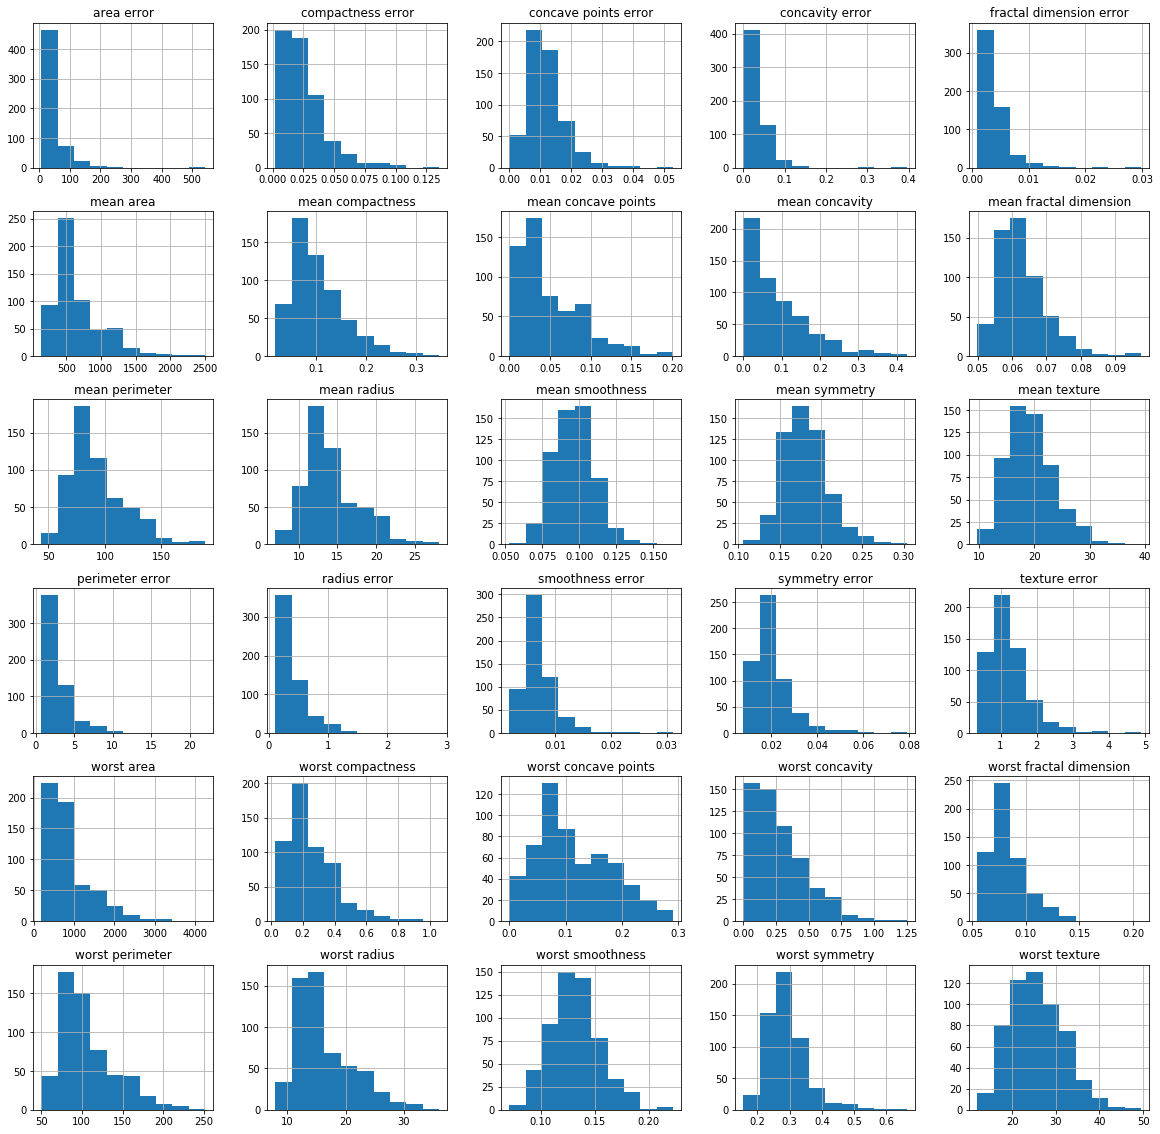

In [21]:
# df.head()
# How would you check the distribution of all the continuous variables 
import matplotlib.pyplot as plt
df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[20,20])


## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df, np.ravel(df_target), test_size=0.30, random_state=101)

# Train the Support Vector Classifier

In [30]:
# Training  the Classifier with both Logistic , Support Vector 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [31]:
model = SVC()
#lgr=LogisticRegression()

In [32]:
model.fit(X_train,y_train)
#lgr.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations

Now let's predict using the trained model.

In [33]:
# predictions=lgr.predict(X_test)
predictions = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
print(confusion_matrix(y_test,predictions))

[[  0  66]
 [  0 105]]


In [36]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [57]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','poly']} 
type(param_grid)

dict

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [59]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
#random=RandomizedSearchCV(SVC(),param_grid,refit=True,verbose=3)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [60]:
%%time
# May take awhile!
grid.fit(X_train,y_train)
#random.fit(X_train,y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=linear, score=0.9548872180451128, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ......... C=0.1, gamma=1, kernel=linear, score=1.0, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=0.9848484848484849, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.9924812030075187, total=   0.8s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.9924812030075187, total=   0.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.9848484848484849, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ...............

[CV] ......... C=1, gamma=0.1, kernel=linear, score=1.0, total=   0.8s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9924812030075187, total=   1.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9924812030075187, total=   0.4s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.9848484848484849, total=   0.3s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ...................

[CV]  C=10, gamma=0.01, kernel=poly, score=0.9848484848484849, total=   0.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.8947368421052632, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9323308270676691, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9624060150375939, total=   0.4s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ...... C=10, gamma=0.001, kernel=linear, score=1.0, total=   0.9s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] ...... C=10, gamma=0.001, kernel=linear, score=1.0, total=   0.8s
[CV] C=10, gamma=0.001, kernel=poly ........

[CV]  C=100, gamma=0.0001, kernel=linear, score=0.9624060150375939, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .... C=100, gamma=0.0001, kernel=linear, score=1.0, total=   0.9s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] .... C=100, gamma=0.0001, kernel=linear, score=1.0, total=   0.8s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV]  C=100, gamma=0.0001, kernel=poly, score=0.9924812030075187, total=   0.6s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV]  C=100, gamma=0.0001, kernel=poly, score=0.9924812030075187, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV]  C=100, gamma=0.0001, kernel=poly, score=0.9848484848484849, total=   0.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf ...

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.6min finished


Wall time: 1min 39s


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best\_estimator_ attribute:

In [61]:
grid.best_params_
#random.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [62]:
grid.best_estimator_
#random.best_estimator_


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [69]:
grid_predictions = grid.predict(X_test)
#r_predictions=random.predict(X_test)

In [70]:
print(confusion_matrix(y_test,grid_predictions))

[[ 62   4]
 [  0 105]]


In [72]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        66
          1       0.96      1.00      0.98       105

avg / total       0.98      0.98      0.98       171

